In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## MUESTO MI DATA SET CON LOS DATOS Y SUS COLUMNAS
df = pd.read_csv("IRIS.csv", index_col=0) 
df.head(100)


,sepal_width,petal_length,petal_width,species
sepal_length,,,,
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...
5.7,3.0,4.2,1.2,Iris-versicolor
5.7,2.9,4.2,1.3,Iris-versicolor
6.2,2.9,4.3,1.3,Iris-versicolor


In [10]:
# Mostrar las primeras filas para vista rápida
print(df.head())

# Mostrar información general
df.info()

# Mostrar estadísticas descriptivas
df.describe()

              sepal_width  petal_length  petal_width      species
sepal_length                                                     
5.1                   3.5           1.4          0.2  Iris-setosa
4.9                   3.0           1.4          0.2  Iris-setosa
4.7                   3.2           1.3          0.2  Iris-setosa
4.6                   3.1           1.5          0.2  Iris-setosa
5.0                   3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 5.1 to 5.9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_width   150 non-null    float64
 1   petal_length  150 non-null    float64
 2   petal_width   150 non-null    float64
 3   species       150 non-null    object 
dtypes: float64(3), object(1)
memory usage: 5.9+ KB


,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000
mean,3.054000,3.758667,1.198667
std,0.433594,1.764420,0.763161
min,2.000000,1.000000,0.100000
25%,2.800000,1.600000,0.300000
50%,3.000000,4.350000,1.300000
75%,3.300000,5.100000,1.800000
max,4.400000,6.900000,2.500000


### Filtramos informacion que no se ocupa en este cado la otra flor la descartamos

In [17]:
# Filtrar solo las especies deseadas
df = df[df["species"].isin(["Iris-setosa", "Iris-versicolor"])]

# Verificar que solo queden esas especies
df["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Name: count, dtype: int64

## Hacemos un poco de limpieza en el data set por si acaso 

In [21]:
# Eliminar duplicados si existen
df = df.drop_duplicates()

# Eliminar filas con valores nulos
df = df.dropna()

# Reiniciar el índice
df = df.reset_index(drop=True)

# Mostrar información del dataset limpio
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_width   93 non-null     float64
 1   petal_length  93 non-null     float64
 2   petal_width   93 non-null     float64
 3   species       93 non-null     object 
dtypes: float64(3), object(1)
memory usage: 3.0+ KB


,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,Iris-setosa
1,3.0,1.4,0.2,Iris-setosa
2,3.2,1.3,0.2,Iris-setosa
3,3.1,1.5,0.2,Iris-setosa
4,3.6,1.4,0.2,Iris-setosa


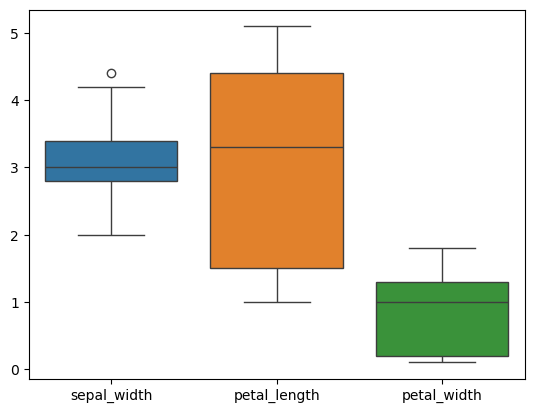

In [23]:
#Vemos si hay valores atipicos
sns.boxplot(data=df.drop(columns=["species"]))
plt.show()


In [30]:
df["species"].value_counts()


species
1    48
0    45
Name: count, dtype: int64

### Perceptron_simple

In [56]:
# Cargar el dataset
df = pd.read_csv("IRIS.csv")  

# Revisar los valores únicos en la columna 'species'
print("Valores únicos en 'species':", df['species'].unique())

# Filtrar solo las especies 'Iris-setosa' e 'Iris-versicolor'
df = df[df['species'].isin(['Iris-setosa', 'Iris-versicolor'])]

# Limpiar posibles espacios o caracteres adicionales
df['species'] = df['species'].str.strip()  # Eliminar espacios antes y después del nombre

# Mapear las especies a valores binarios: 'Iris-setosa' -> 0, 'Iris-versicolor' -> 1
df['species'] = df['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1})

# Verificar nuevamente los valores de la columna 'species' después de mapear
print("Valores únicos en 'species' después del mapeo:", df['species'].unique())

# Extraer las columnas 'sepal_width' y 'petal_length' para las entradas
inputs = df[['sepal_width', 'petal_length']].values

# Extraer las etiquetas 'species' para las salidas
labels = df['species'].values

# Mostrar las primeras filas de inputs y labels para verificar
print("Entradas (inputs):")
print(inputs[:5])  # Muestra las primeras 5 entradas
print("Salidas (labels):")
print(labels[:5])  # Muestra las primeras 5 salidas


Valores únicos en 'species': ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Valores únicos en 'species' después del mapeo: [0 1]
Entradas (inputs):
[[3.5 1.4]
 [3.  1.4]
 [3.2 1.3]
 [3.1 1.5]
 [3.6 1.4]]
Salidas (labels):
[0 0 0 0 0]


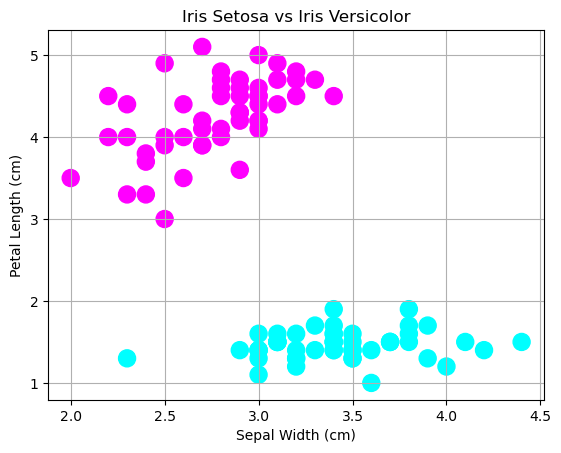

In [59]:

# Graficar los datos para observar si son linealmente separables
plt.scatter(inputs[:, 0], inputs[:, 1], c=labels, cmap='cool', marker='o', s=150)
plt.title("Iris Setosa vs Iris Versicolor")  # Cambié el título para reflejar el contexto
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Petal Length (cm)")
plt.grid(True)
plt.show()


In [63]:
# Definición de hiperparámetros
learning_rate = 0.5
bias = 0.122
epochs = 100
weights = np.array([0.356, 0.259])  # Pesos iniciales

In [114]:
#CREACION DE LA CLASE PERCEPTRON
class Perceptron():
    def __init__(self, inputs, labels, learning_rate, weights, bias, epochs=20):
        self.inputs = inputs
        self.labels = labels
        self.learning_rate = learning_rate
        self.weights = np.array(weights)  # Asegúrate de que los pesos sean un array de numpy
        self.bias = bias
        self.epochs = epochs

    def activation(self, z):
        return 1 if z > 0 else 0

    def predict(self, input_x, weights_ajustados, bias_ajustado):
        z = np.dot(input_x, weights_ajustados) + bias_ajustado
        y_pred = self.activation(z)
        return y_pred
    
    def fit(self):
        for epoch in range(self.epochs):
            print(f"Epoch {epoch+1}/{self.epochs}", end=" ")
            total_error = 0
            for input, label in zip(self.inputs, self.labels):
                z = np.dot(input, self.weights) + self.bias
                y_pred = self.activation(z)
                error = label - y_pred
                total_error += abs(error)
                
                # Actualizar pesos y sesgo
                delta_w = self.learning_rate * error * input
                self.weights += delta_w  # Actualizar pesos
                delta_bias = self.learning_rate * error
                self.bias += delta_bias  # Actualizar sesgo

            # Calcular error promedio
            average_error = total_error / len(self.labels)
            print(f"Average Error: {average_error}")

            # Depuración: Verificar si la actualización de los pesos es correcta
            if np.any(np.isnan(self.weights)) or np.any(np.isnan(self.bias)):
                print("Error: NaN detected in weights or bias!")
                return None, None

        # Devolver pesos y sesgo ajustados
        return self.weights, self.bias

        

In [118]:
# Crear el objeto perceptron
perceptron = Perceptron(inputs, labels, learning_rate, weights, bias, epochs)

# Entrenar el perceptron
w, b = perceptron.fit()

Epoch 1/100 Average Error: 0.5
Epoch 2/100 Average Error: 0.75
Epoch 3/100 Average Error: 0.75
Epoch 4/100 Average Error: 0.5
Epoch 5/100 Average Error: 0.25
Epoch 6/100 Average Error: 0.0
Epoch 7/100 Average Error: 0.0
Epoch 8/100 Average Error: 0.0
Epoch 9/100 Average Error: 0.0
Epoch 10/100 Average Error: 0.0
Epoch 11/100 Average Error: 0.0
Epoch 12/100 Average Error: 0.0
Epoch 13/100 Average Error: 0.0
Epoch 14/100 Average Error: 0.0
Epoch 15/100 Average Error: 0.0
Epoch 16/100 Average Error: 0.0
Epoch 17/100 Average Error: 0.0
Epoch 18/100 Average Error: 0.0
Epoch 19/100 Average Error: 0.0
Epoch 20/100 Average Error: 0.0
Epoch 21/100 Average Error: 0.0
Epoch 22/100 Average Error: 0.0
Epoch 23/100 Average Error: 0.0
Epoch 24/100 Average Error: 0.0
Epoch 25/100 Average Error: 0.0
Epoch 26/100 Average Error: 0.0
Epoch 27/100 Average Error: 0.0
Epoch 28/100 Average Error: 0.0
Epoch 29/100 Average Error: 0.0
Epoch 30/100 Average Error: 0.0
Epoch 31/100 Average Error: 0.0
Epoch 32/100 A

In [120]:
print(f"Predicción para [0,0] --> {perceptron.predict([0,0], w, b)}")
print(f"Predicción para [0,1] --> {perceptron.predict([0,1], w, b)}")
print(f"Predicción para [1,0] --> {perceptron.predict([1,0], w, b)}")
print(f"Predicción para [1,1] --> {perceptron.predict([1,1], w, b)}")

Predicción para [0,0] --> 0
Predicción para [0,1] --> 0
Predicción para [1,0] --> 0
Predicción para [1,1] --> 1
